# INGENIERÍA DE DESCRIPTORES


## Detección de características
## Extracción de características
## Reducción y selección de características


Característica:Los datos utilizados para crear un modelo de conocimiento consisten en 
variables de resultado, y una serie de variables descriptoras, que contienen datos que 
se cree que determinan las variables de resultado:

    * Los datos que muestran los precios reales son la VARIABLE RESULTADO
    
    * Los datos que muestran cosas que se cree que determinan los valores de las 
    propiedades, como el tamaño de la casa, el No de habitaciones y la ubicación, 
    son VARIABLES DESCRIPTORAS.


<img src="How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png">

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Feature Extraction
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

# LECTURA DE DATOS

Los datos son tomados de: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Los datos consisten en una prueba médica donde se determina si el paciente tiene o no cáncer de seno


In [2]:
dataset = pd.read_csv('wdbc.csv',sep=',') #

print(dataset.dtypes)

X = dataset.iloc[:,2:]
Y = dataset.iloc[:,1].to_frame()

replace_map = {"CLASS": {'M':1, 'B':-1}}
Y.replace(replace_map, inplace=True)

ID         int64
CLASS     object
COL1     float64
COL2     float64
COL3     float64
COL4     float64
COL5     float64
COL6     float64
COL7     float64
COL8     float64
COL9     float64
COL10    float64
COL11    float64
COL12    float64
COL13    float64
COL14    float64
COL15    float64
COL16    float64
COL17    float64
COL18    float64
COL19    float64
COL20    float64
COL21    float64
COL22    float64
COL23    float64
COL24    float64
COL25    float64
COL26    float64
COL27    float64
COL28    float64
COL29    float64
COL30    float64
dtype: object


# FEATURE SELECTION

La selección de caracteristicas (Feature selection), es un proceso que consiste en seleccionar las características más importantes/relevantes de un conjunto de datos. Es importante considerar

Puntaje de cada característica:
 [6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]


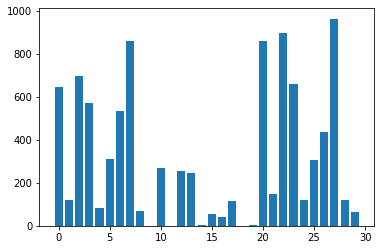

Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [17]:
#Feature Selection with Univariate Statistical Test---------------------------#

# f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X.values, Y.CLASS.values)
# summarize scores
print('Puntaje de cada característica:\n',fit.scores_)
features_1 = fit.transform(X)
# plot the scores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()
# summarize selected features
print('Vista de las variables seleccionadas:\n',features_1[0:5,:])

Puntaje de cada característica:
 [0.36941252 0.09928872 0.40327235 0.35783388 0.07689878 0.21307405
 0.37326426 0.43866346 0.06174853 0.01092466 0.2463985  0.
 0.27460584 0.34010263 0.01578367 0.07493866 0.11699098 0.12867392
 0.01150964 0.03872274 0.45263462 0.12280818 0.47987755 0.46492495
 0.10422495 0.22309579 0.31668819 0.43323109 0.08990728 0.07012059]

Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.019e+03]
 [7.017e-02 2.499e+01 1.588e+02 1.956e+03]
 [1.279e-01 2.357e+01 1.525e+02 1.709e+03]
 [1.052e-01 1.491e+01 9.887e+01 5.677e+02]
 [1.043e-01 2.254e+01 1.522e+02 1.575e+03]]


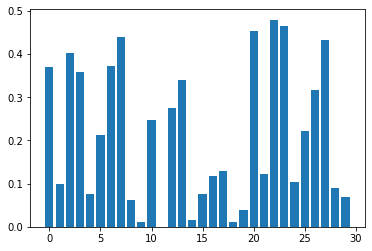


Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [21]:
# mutual_info_classif
test = SelectKBest(score_func=mutual_info_classif, k=4)
fit = test.fit(X.values, Y.CLASS.values)
# summarize scores
print('Puntaje de cada característica:\n',fit.scores_)
features_2 = fit.transform(X.values)
print('\nVista de las variables seleccionadas:\n',features_2[0:5,:])

# plot the scores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()
# summarize selected features
print('\nVista de las variables seleccionadas:\n',features_1[0:5,:])

In [22]:
#Recursive Feature Elimination------------------------------------------------#
# Feature Selection with RFE (Recursive feature elimination) performs a greedy search to 
# find the best performing feature subset. It iteratively creates models and determines 
# the best or the worst performing feature at each iteration. It constructs the subsequent 
# models with the left features until all the features are explored.
# https://www.datacamp.com/community/tutorials/feature-selection-python
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X.values, Y.CLASS.values)
rfe_X = fit.support_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: [ 3  9 10 20 23 16  2  4  6 26  1  7  5 18 28 21 13 24 25 27 19  8 17 22
 14 11  1  1 12 15]


In [23]:
model = SVC(kernel="linear")
rfe = RFE(model, 5, step=1)
fit = rfe.fit(X.values, Y.CLASS.values)
svc_X = fit.support_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True False]
Feature Ranking: [ 4 17 12 26  9  8  5  6  7 23 21  2 10 18 19 15 14 16 24 22  3 11 20 25
  1  1  1  1  1 13]


https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

L1-based feature selection

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

print('Tamaño del dataset original',X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X.values, Y.CLASS.values)
model = SelectFromModel(lsvc, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_LinearSVC_X = model.get_support()
print("Selected Features: %s" % model.get_support())
print(X_new.shape)

Tamaño del dataset original (569, 30)
Selected Features: [False False  True  True False False False False False False False False
 False  True False False False False False False False  True False  True
 False False False False False False]
(569, 5)


C:\Users\dragon\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tree-based feature selection

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

print('Tamaño del dataset original',X.shape)
clf = ExtraTreesClassifier(n_estimators=50) #n_estimators: The number of trees in the forest.
clf = clf.fit(X.values, Y.CLASS.values)
print('\nImportancia de las variables:\n',clf.feature_importances_)
model = SelectFromModel(clf, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_ExtraTrees_X = model.get_support()
print("Selected Features: %s" % model.get_support())
print('Tamaño del dataset transformado',X_new.shape)

Tamaño del dataset original (569, 30)

Importancia de las variables:
 [0.04986967 0.02496648 0.06514488 0.06159351 0.00951171 0.02531108
 0.05744552 0.09548127 0.00648598 0.00710645 0.01823832 0.00497831
 0.00738967 0.0506891  0.00590229 0.00684568 0.00609202 0.00631373
 0.00607234 0.00719101 0.08859014 0.0230845  0.10329385 0.04173761
 0.0206261  0.02397983 0.03997241 0.10325972 0.02049991 0.01232691]
Selected Features: [False False  True False False False False  True False False False False
 False False False False False False False False  True False  True False
 False False False  True False False]
Tamaño del dataset transformado (569, 5)


In [31]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_name = X.columns.tolist()
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'RFE':rfe_X, 'SVC':svc_X, 'Model-ExtraTrees':model_ExtraTrees_X, 'Model-LinearSVC':model_LinearSVC_X})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

,Feature,RFE,SVC,Model-ExtraTrees,Model-LinearSVC,Total
1,COL28,True,True,True,False,3
2,COL3,False,False,True,True,2
3,COL27,True,True,False,False,2
4,COL26,False,True,True,False,2
5,COL24,False,False,True,True,2
6,COL14,False,False,True,True,2
7,COL8,False,False,True,False,1
8,COL7,False,False,True,False,1
9,COL4,False,False,False,True,1
10,COL29,False,True,False,False,1


# FEATURE EXTRACTION

In [7]:
# Feature Extraction with PCA
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.98204467 0.01617649 0.00155751]
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3